# QUESTION : 3

* APPLYING SMOOTHENING WITH UNIFORM AND GAUSSIAN KERENL

In [1]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PL


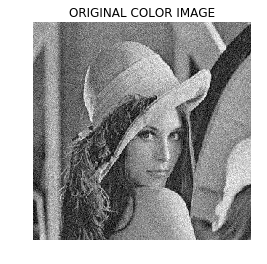

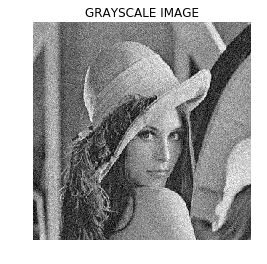

In [2]:

x = CV.imread("image3.jpg") 

#.....creatinG FUNCTION 
def RGB2GRAY(y):
    '''
    IT IS FUNCTION FOR 
    CONVERTING RGB IMAGE 
    IN TO GRAYSCALE
    '''
    if x.shape[2]!=3 :
        I = y
        PL.figure()
        PL.imshow(I)
        PL.title('ORIGINAL GRAY IMAGE')
    if x.shape[2]==3:
        PL.figure(1)
        PL.imshow(y)
        PL.axis('off')
        PL.title('ORIGINAL COLOR IMAGE')
        B = y[:,:,0]
        G = y[:,:,1]
        R = y[:,:,2]
        A = B/3+G/3+R/3
        PL.figure(2)
        PL.imshow(A,'gray')
        PL.axis('off')
        PL.title('GRAYSCALE IMAGE')
    
    return A


#...CALLING FUNCTION.....
I = RGB2GRAY(x)


* "CONV" IS AN FUNCTION WHICH WILL  PERFORM CONVOLUTION OF KERNEL WITH AN IMAGE , IT WILL TAKE TWO ARGUMENT ONE IS iMAGE ITSELF AND SECOND ONE IS KERNEL(OPERATOR)
* THIS FUNCTION WILL RETURN 6 IMAGES AFTER APPLYING CONVOLUTION WITH BOTH GAUSSIAN AND UNIFORM KERNEL

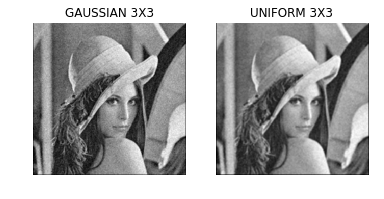

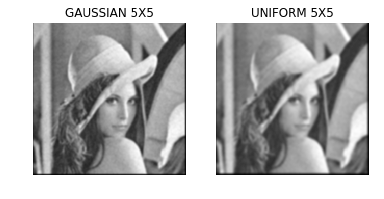

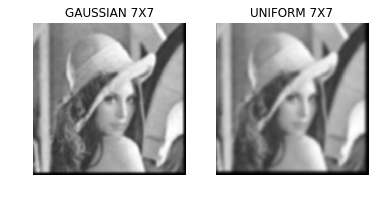

In [3]:
def conv(IM,K):
    if K.shape[0] == 3:
        Z = NP.zeros((IM.shape[0]+2,IM.shape[1]+2))
        Z[1:Z.shape[0]-1,1:Z.shape[1]-1] = IM
        for i in range(0,Z.shape[0]-2):
            for j in range(0,Z.shape[1]-2):
                IM[i,j]=sum(sum(Z[i:i+3,j:j+3]*K))
        return IM
    if K.shape[0] == 5:
        Z = NP.zeros((IM.shape[0]+4,IM.shape[1]+4))
        Z[1:Z.shape[0]-3,1:Z.shape[1]-3] = IM
        for i in range(0,Z.shape[0]-4):
             for j in range(0,Z.shape[1]-4):
                    IM[i,j]=sum(sum(Z[i:i+5,j:j+5]*K))
        return IM
    if K.shape[0] == 7:
        Z = NP.zeros((IM.shape[0]+6,IM.shape[1]+6))
        Z[1:Z.shape[0]-5,1:Z.shape[1]-5] = IM
        for i in range(0,Z.shape[0]-6):
             for j in range(0,Z.shape[1]-6):
                    IM[i,j]=sum(sum(Z[i:i+7,j:j+7]*K))
        return IM
                    
SIGMA = [3/7,5/7,7/7]       
for k in range(0,3):
    if k==0:
        GAUSSIAN_KERNEL = NP.zeros((3,3))
        
        for i in range(-1,2):
            for j in range(-1,2):
                GAUSSIAN_KERNEL[abs(j-1),i+1] = (NP.exp(-(i**2 + j**2)/2*(SIGMA[k]**2)))*1/2*NP.pi*(SIGMA[k]**2)
                UNIFORM_KERNEL = NP.ones((3,3))/9
        PL.figure(1)
        NEW = conv(I,GAUSSIAN_KERNEL)
        PL.subplot(121)
        PL.imshow(NEW,'gray')
        PL.axis('off')
        PL.title('GAUSSIAN 3X3')
        NEW = conv(I,UNIFORM_KERNEL)
        PL.subplot(122)
        PL.imshow(NEW,'gray')
        PL.axis('off')
        PL.title('UNIFORM 3X3')
    if k==1:
        GAUSSIAN_KERNEL = NP.zeros((5,5))
        for i in range(-2,3):
            
            for j in range(-2,3):
                GAUSSIAN_KERNEL[abs(j-2),i+2] = (NP.exp(-(i**2 + j**2)/2*(SIGMA[k]**2)))*1/2*NP.pi*(SIGMA[k]**2)
                UNIFORM_KERNEL = NP.ones((5,5))/9
        PL.figure(2)
        NEW = conv(I,GAUSSIAN_KERNEL)
        PL.subplot(121)
        PL.imshow(NEW,'gray')
        PL.axis('off')
        PL.title('GAUSSIAN 5X5')
        NEW = conv(I,UNIFORM_KERNEL)
        PL.subplot(122)
        PL.imshow(NEW,'gray')
        PL.axis('off')
        PL.title('UNIFORM 5X5')
    if k==2:
        GAUSSIAN_KERNEL = NP.zeros((7,7))
        for i in range(-3,4):
            for j in range(-3,4):
                GAUSSIAN_KERNEL[abs(j-3),i+3] = (NP.exp(-(i**2 + j**2)/2*(SIGMA[k]**2)))*1/2*NP.pi*(SIGMA[k]**2)
                UNIFORM_KERNEL = NP.ones((7,7))/9
        PL.figure(3)
        NEW = conv(I,GAUSSIAN_KERNEL)
        PL.subplot(121)
        PL.imshow(NEW,'gray')
        PL.axis('off')
        PL.title('GAUSSIAN 7X7')
        NEW = conv(I,UNIFORM_KERNEL)
        PL.subplot(122)
        PL.imshow(NEW,'gray')
        PL.axis('off')
        PL.title('UNIFORM 7X7')


